In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
AAL=pd.read_csv("AusApparalSales4thQrt2020.csv")

In [293]:
AAL

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


<h3><b>No Missing Data Found</b></h3>

In [294]:
AAL.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

<h3><b>isna() & isnull() are identical function to find fissing values</b></h3>

In [295]:
AAL.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

<h3><b>notna() Function finds all the existing/non- missing values</b></h3>

In [296]:
AAL.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [297]:
AAL.groupby(['Date','Group','Unit'])['Sales'].sum()

Date        Group  Unit
1-Dec-2020  Kids   6        15000
                   7        35000
                   9        67500
                   11       27500
                   13       32500
                            ...  
9-Oct-2020  Women  35       87500
                   37       92500
                   38       95000
                   42      105000
                   43      107500
Name: Sales, Length: 5679, dtype: int64

In [298]:
AAL.groupby(['State','Group'])['Sales'].sum()

State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64

<h2><b>Data Analysis</b></h2>

In [299]:
AAL[['Sales','Unit']].describe()

,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


In [300]:
AAL[['Sales','Unit']].median()

Sales    35000.0
Unit        14.0
dtype: float64

In [301]:
AAL[['Sales','Unit']].mode()

,Sales,Unit
0,22500,9


<h4><b>Group With Max Sales</b></h4>

In [302]:
print("General Analysis \n\n",AAL.groupby(['Group'])['Sales'].max(),"\n\n State Wise Analysis\n\n",AAL.groupby(['State','Group'])['Sales'].max())

General Analysis 

 Group
Kids       162500
Men        160000
Seniors    162500
Women      162500
Name: Sales, dtype: int64 

 State Wise Analysis

 State  Group  
NSW    Kids       112500
       Men        112500
       Seniors    112500
       Women      112500
NT     Kids        37500
       Men         37500
       Seniors     37500
       Women       37500
QLD    Kids        62500
       Men         62500
       Seniors     62500
       Women       62500
SA     Kids        87500
       Men         87500
       Seniors     87500
       Women       87500
TAS    Kids        37500
       Men         37500
       Seniors     37500
       Women       37500
VIC    Kids       162500
       Men        160000
       Seniors    162500
       Women      162500
WA     Kids        37500
       Men         37500
       Seniors     37500
       Women       37500
Name: Sales, dtype: int64


<h4><b>Group With Min Sales</b></h4>

In [303]:
print("General Anakysis  \n\n",AAL.groupby(['Group'])['Sales'].min()," \n\nState Wise Analysis \n\n",AAL.groupby(['State','Group'])['Sales'].min())

General Anakysis  

 Group
Kids       5000
Men        5000
Seniors    5000
Women      5000
Name: Sales, dtype: int64  

State Wise Analysis 

 State  Group  
NSW    Kids       30000
       Men        30000
       Seniors    30000
       Women      30000
NT     Kids        5000
       Men         5000
       Seniors     5000
       Women       5000
QLD    Kids        7500
       Men         7500
       Seniors     7500
       Women       7500
SA     Kids       25000
       Men        25000
       Seniors    25000
       Women      25000
TAS    Kids        5000
       Men         5000
       Seniors     5000
       Women       5000
VIC    Kids       50000
       Men        50000
       Seniors    50000
       Women      50000
WA     Kids        5000
       Men         5000
       Seniors     5000
       Women       5000
Name: Sales, dtype: int64


In [304]:
AAL.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7560 entries, 0 to 7559
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
7560 non-null   object
dtypes: object(1)
memory usage: 59.2+ KB


In [305]:
print("Start Date:",AAL.loc[0,'Date'],"\t","End Date:",AAL.loc[7559,'Date'])

Start Date: 1-Oct-2020 	 End Date: 30-Dec-2020


<h2><b>Converting Date Format<br>
    1-Oct-2020            To          2020-10-1</b></h2>

In [306]:
AAL['Date'] = pd.to_datetime(AAL['Date'])

In [307]:
AAL['Date'].dt.month

0       10
1       10
2       10
3       10
4       10
        ..
7555    12
7556    12
7557    12
7558    12
7559    12
Name: Date, Length: 7560, dtype: int32

In [308]:
pip install jupyterlab_limit_output

In [309]:
AAL['Date'].dt.dayofweek

0       3
1       3
2       3
3       3
4       3
       ..
7555    2
7556    2
7557    2
7558    2
7559    2
Name: Date, Length: 7560, dtype: int32

<h4><b>Monthly Analysis</b></h4>

<h4><b>Octomber Analysis</b></h4>

In [310]:
AAL1=AAL[AAL['Date'].dt.month==10]
AAL2=AAL[AAL['Date'].dt.month==11]
AAL3=AAL[AAL['Date'].dt.month==12]

In [311]:
print(AAL1['Sales'].sum(),"\n\n",AAL1.groupby(['State'])['Sales'].sum(),"\n\n",AAL1.groupby(['State','Group'])['Sales'].sum())


114290000 

 State
NSW    25007500
NT      8222500
QLD    11120000
SA     20610000
TAS     8015000
VIC    33442500
WA      7872500
Name: Sales, dtype: int64 

 State  Group  
NSW    Kids       6340000
       Men        6270000
       Seniors    5915000
       Women      6482500
NT     Kids       2140000
       Men        2122500
       Seniors    1970000
       Women      1990000
QLD    Kids       2837500
       Men        2855000
       Seniors    2772500
       Women      2655000
SA     Kids       4990000
       Men        5087500
       Seniors    5530000
       Women      5002500
TAS    Kids       2050000
       Men        2035000
       Seniors    2022500
       Women      1907500
VIC    Kids       8312500
       Men        8387500
       Seniors    8367500
       Women      8375000
WA     Kids       1965000
       Men        2127500
       Seniors    1987500
       Women      1792500
Name: Sales, dtype: int64


<h4><b>November Analysis</b></h4>

In [312]:
print(AAL2['Sales'].sum(),"\n\n",AAL2.groupby(['State'])['Sales'].sum(),"\n\n",AAL2.groupby(['State','Group'])['Sales'].sum())

90682500 

 State
NSW    21490000
NT      5257500
QLD     8110000
SA     15532500
TAS     5545000
VIC    29530000
WA      5217500
Name: Sales, dtype: int64 

 State  Group  
NSW    Kids       5312500
       Men        5490000
       Seniors    5362500
       Women      5325000
NT     Kids       1332500
       Men        1280000
       Seniors    1260000
       Women      1385000
QLD    Kids       2042500
       Men        1982500
       Seniors    1992500
       Women      2092500
SA     Kids       3810000
       Men        3910000
       Seniors    3795000
       Women      4017500
TAS    Kids       1472500
       Men        1350000
       Seniors    1385000
       Women      1337500
VIC    Kids       7542500
       Men        7270000
       Seniors    7232500
       Women      7485000
WA     Kids       1370000
       Men        1332500
       Seniors    1295000
       Women      1220000
Name: Sales, dtype: int64


<h4><b>December Analysis</b></h4>

In [313]:
print(AAL3['Sales'].sum(),"\n\n",AAL3.groupby(['State'])['Sales'].sum(),"\n\n",AAL3.groupby(['State','Group'])['Sales'].sum())

135330000 

 State
NSW    28472500
NT      9100000
QLD    14187500
SA     22715000
TAS     9200000
VIC    42592500
WA      9062500
Name: Sales, dtype: int64 

 State  Group  
NSW    Kids        6935000
       Men         7262500
       Seniors     6910000
       Women       7365000
NT     Kids        2227500
       Men         2360000
       Seniors     2235000
       Women       2277500
QLD    Kids        3630000
       Men         3555000
       Seniors     3425000
       Women       3577500
SA     Kids        5715000
       Men         5657500
       Seniors     5392500
       Women       5950000
TAS    Kids        2252500
       Men         2372500
       Seniors     2242500
       Women       2332500
VIC    Kids       10505000
       Men        10750000
       Seniors    10715000
       Women      10622500
WA     Kids        2290000
       Men         2292500
       Seniors     2230000
       Women       2250000
Name: Sales, dtype: int64


<h4><b>Quaterly Analysis</b></h4>

In [314]:
AAL4=pd.to_datetime(AAL['Date'])

In [315]:
Idx=AAL['Sales']

In [316]:
AAL4.index=Idx

In [317]:
AAL4=pd.to_datetime(AAL4)

In [318]:
sr = pd.Series(pd.date_range('2012-12-12 12:12',  
                       periods = 5)) 

In [319]:
idx = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'] 

In [320]:
sr.index = idx 

In [321]:
sr

Day 1   2012-12-12 12:12:00
Day 2   2012-12-13 12:12:00
Day 3   2012-12-14 12:12:00
Day 4   2012-12-15 12:12:00
Day 5   2012-12-16 12:12:00
dtype: datetime64[ns]

In [322]:
result = sr.dt.quarter 

In [323]:
result

Day 1    4
Day 2    4
Day 3    4
Day 4    4
Day 5    4
dtype: int32

In [324]:
import datetime as dt

<h1><b>Data Visualization</b></b></h1> 

In [325]:
import matplotlib.pyplot as plt

In [326]:
AAL1=AAL.drop(columns = ['Time','Date','Unit'])

In [327]:
W=AAL.groupby(['State','Group'])['Sales'].sum()
W

State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64

In [328]:
Y=np.array(AAL.groupby(['State','Group'])['Sales'].sum())

In [329]:
Y

array([18587500, 19022500, 18187500, 19172500,  5700000,  5762500,
        5465000,  5652500,  8510000,  8392500,  8190000,  8325000,
       14515000, 14655000, 14717500, 14970000,  5775000,  5757500,
        5650000,  5577500, 26360000, 26407500, 26315000, 26482500,
        5625000,  5752500,  5512500,  5262500], dtype=int64)

In [330]:
Y1=np.split(Y,7)

In [331]:
Y1

[array([18587500, 19022500, 18187500, 19172500], dtype=int64),
 array([5700000, 5762500, 5465000, 5652500], dtype=int64),
 array([8510000, 8392500, 8190000, 8325000], dtype=int64),
 array([14515000, 14655000, 14717500, 14970000], dtype=int64),
 array([5775000, 5757500, 5650000, 5577500], dtype=int64),
 array([26360000, 26407500, 26315000, 26482500], dtype=int64),
 array([5625000, 5752500, 5512500, 5262500], dtype=int64)]

In [332]:
Y1[0]

array([18587500, 19022500, 18187500, 19172500], dtype=int64)

In [333]:
X=np.array(['Kid','Men','Seniors','Women'])

In [334]:
X

array(['Kid', 'Men', 'Seniors', 'Women'], dtype='<U7')

<h1>State-Wise Sales Analysis For Demographic Groups</h1>

<h2>NSW</h2>

Text(0.5, 0, 'NSW')

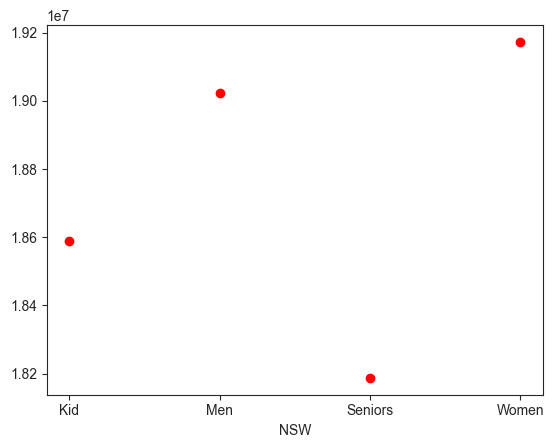

In [335]:
plt.scatter(X,Y1[0], color = 'red')
plt.xlabel('NSW')

<h2>NT</h2>

Text(0.5, 0, 'NT')

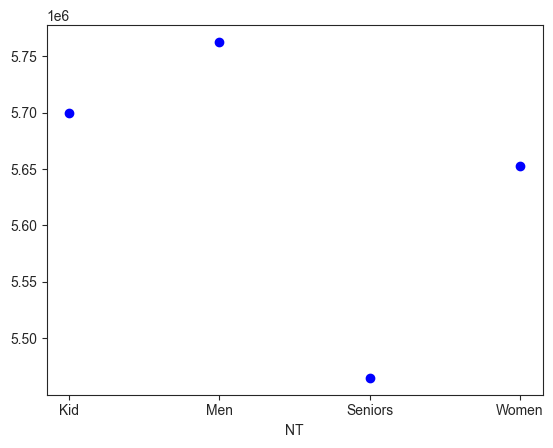

In [336]:
plt.scatter(X,Y1[1], color = 'blue')
plt.xlabel('NT')

<h2>QLD</h2>

Text(0.5, 0, 'QLD')

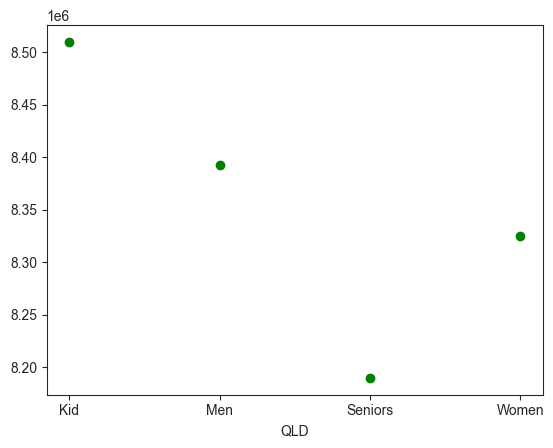

In [337]:
plt.scatter(X,Y1[2], color = 'green')
plt.xlabel('QLD')

<h2>SA</h2>

Text(0.5, 0, 'SA')

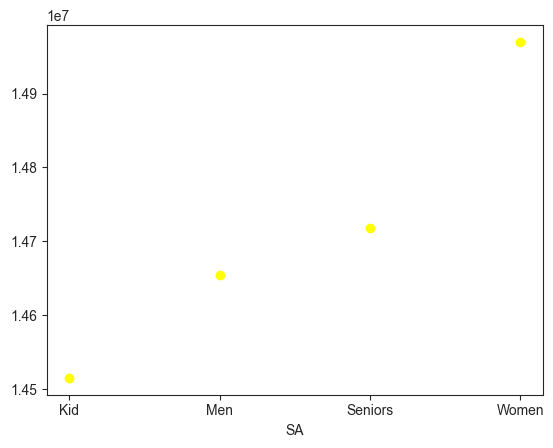

In [338]:
plt.scatter(X,Y1[3], color = 'yellow')
plt.xlabel('SA')

<h2>TAS</h2>

Text(0.5, 0, 'TAS')

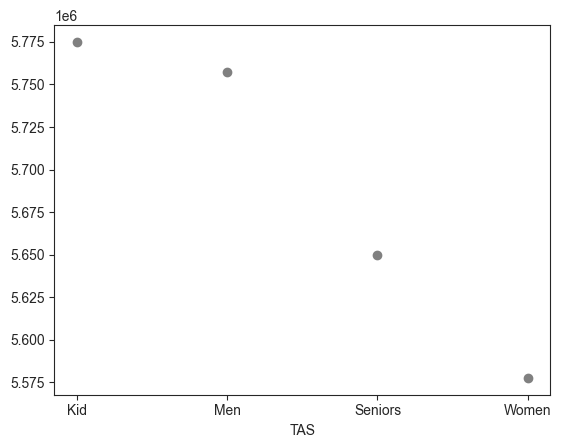

In [339]:
plt.scatter(X,Y1[4], color = 'grey')
plt.xlabel('TAS')

<h2>VIC</h2>

Text(0.5, 0, 'VIC')

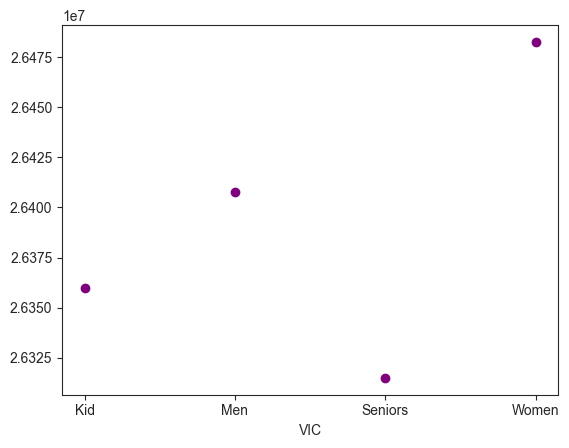

In [340]:
plt.scatter(X,Y1[5], color = 'purple')
plt.xlabel('VIC')

<h2>WA</h2>

Text(0.5, 0, 'WA')

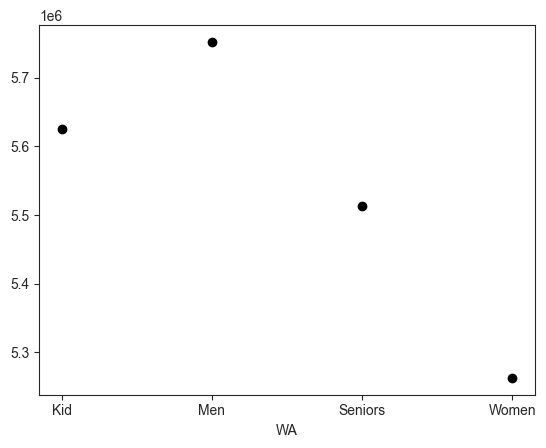

In [341]:
plt.scatter(X,Y1[6], color = 'black')
plt.xlabel('WA')

In [342]:
A1=np.array(['NSW-K','NSW-M','NDW-S','NSW-W'])
A2=np.array(['NT-K','NT-M','NT-S','NT-W'])
A3=np.array(['QLD-K','QLD-M','QLD-S','QLD-W'])
A4=np.array(['SA-K','SA-M','SA-S','SA-W'])
A5=np.array(['TAS-K','TAS-M','TAS-S','TAS-W'])
A6=np.array(['VIC-K','VIC-M','VIC-S','VIC-W'])
A7=np.array(['WA-K','WA-M','WA-S','WA-W'])
A8=np.array([A1,A2,A3,A4,A5,A6,A7])

In [343]:
A8

array([['NSW-K', 'NSW-M', 'NDW-S', 'NSW-W'],
       ['NT-K', 'NT-M', 'NT-S', 'NT-W'],
       ['QLD-K', 'QLD-M', 'QLD-S', 'QLD-W'],
       ['SA-K', 'SA-M', 'SA-S', 'SA-W'],
       ['TAS-K', 'TAS-M', 'TAS-S', 'TAS-W'],
       ['VIC-K', 'VIC-M', 'VIC-S', 'VIC-W'],
       ['WA-K', 'WA-M', 'WA-S', 'WA-W']], dtype='<U5')

Text(0.5, 0, 'NSW           NT            QLD           SA           TAS           VIC           WA')

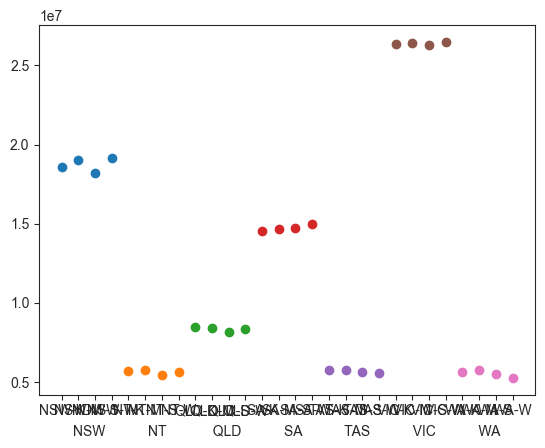

In [344]:
for i in range(0,7):
    plt.scatter(A8[i],Y1[i])
plt.xlabel('NSW           NT            QLD           SA           TAS           VIC           WA')

<h1><b>Group Wise Analysis Across Various States</b></h1>

In [345]:
Y=AAL.groupby(['Group','State'])['Sales'].sum()
Y

Group    State
Kids     NSW      18587500
         NT        5700000
         QLD       8510000
         SA       14515000
         TAS       5775000
         VIC      26360000
         WA        5625000
Men      NSW      19022500
         NT        5762500
         QLD       8392500
         SA       14655000
         TAS       5757500
         VIC      26407500
         WA        5752500
Seniors  NSW      18187500
         NT        5465000
         QLD       8190000
         SA       14717500
         TAS       5650000
         VIC      26315000
         WA        5512500
Women    NSW      19172500
         NT        5652500
         QLD       8325000
         SA       14970000
         TAS       5577500
         VIC      26482500
         WA        5262500
Name: Sales, dtype: int64

In [346]:
Y=np.array(AAL.groupby(['Group','State'])['Sales'].sum())
Y=np.split(Y,4)
Y

[array([18587500,  5700000,  8510000, 14515000,  5775000, 26360000,
         5625000], dtype=int64),
 array([19022500,  5762500,  8392500, 14655000,  5757500, 26407500,
         5752500], dtype=int64),
 array([18187500,  5465000,  8190000, 14717500,  5650000, 26315000,
         5512500], dtype=int64),
 array([19172500,  5652500,  8325000, 14970000,  5577500, 26482500,
         5262500], dtype=int64)]

In [347]:
X=np.array(['NSW','NT','QLD','SA','TAS','VIC','WA'])

<h2>KIDS</h2>

Text(0.5, 0, 'KIDS')

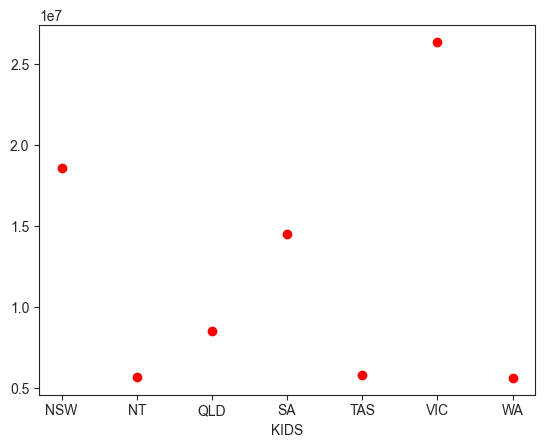

In [348]:
plt.scatter(X,Y[0], color = 'red')
plt.xlabel('KIDS')

<h2>MENS</h2>

Text(0.5, 0, 'MENS')

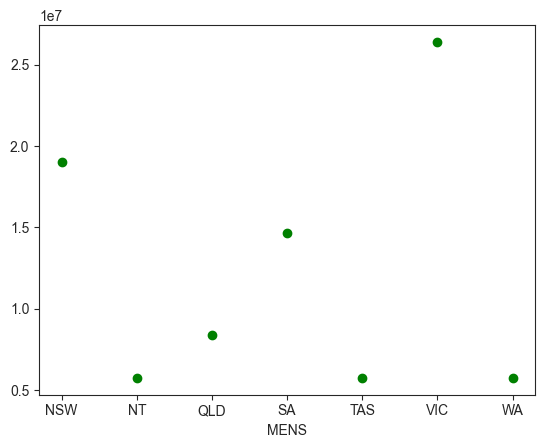

In [349]:
plt.scatter(X,Y[1], color = 'green')
plt.xlabel('MENS')

<h2>SENIORS</h2>

Text(0.5, 0, 'SENIORS')

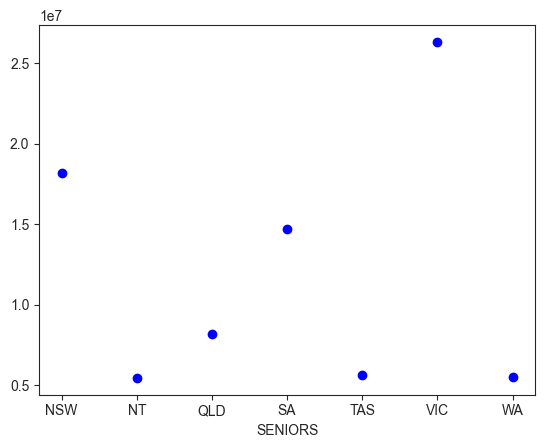

In [350]:
plt.scatter(X,Y[2], color = 'blue')
plt.xlabel('SENIORS')

<h2>WOMEN</h2>

Text(0.5, 0, 'WOMENS')

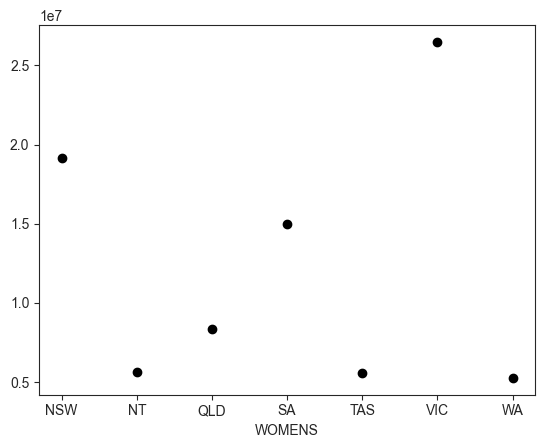

In [351]:
plt.scatter(X,Y[3], color = 'black')
plt.xlabel('WOMENS')

In [352]:
Y1=np.array(AAL.groupby(['Group','State'])['Sales'].sum())
Y1=np.split(Y1,4)

In [353]:
X1=np.array(['K-NSW','K-NT','K-QLD','K-SA','K-TAS','K-VIC','K-WA'])
X2=np.array(['M-NSW','M-NT','M-QLD','M-SA','M-TAS','M-VIC','M-WA'])
X3=np.array(['S-NSW','S-NT','S-QLD','S-SA','S-TAS','S-VIC','S-WA'])
X4=np.array(['W-NSW','W-NT','W-QLD','W-SA','W-TAS','W-VIC','W-WA'])
X4=np.array([X1,X2,X3,X4])

Text(0.5, 0, 'Kids                  Mens                 Seniors                 Womens')

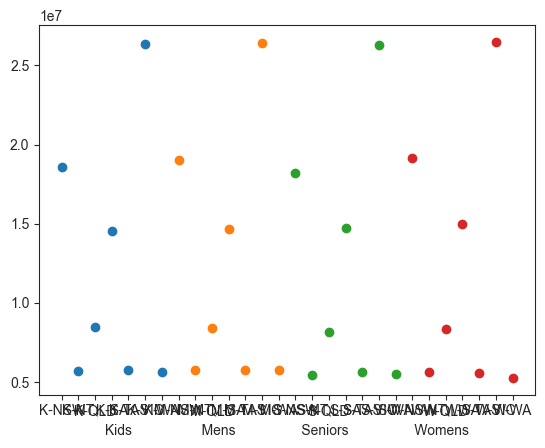

In [354]:
for i in range(0,4):
    plt.scatter(X4[i],Y[i])
plt.xlabel('Kids                  Mens                 Seniors                 Womens')

In [369]:
AAL['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

<h1><b>WA  Peak Time Of The Day Analysis</b></h1>

In [356]:
TDA=AAL

In [357]:
TDA=TDA.drop(columns = ['Group','Unit'])

<h2><b>Taking Only WA State Values From Data Set</b></h2>

In [358]:
TDA=TDA[TDA['State']==' WA']

<h2><b>Separating Morning Afternoon Evening Data Entries</b></h2>

In [359]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

<h2><b>Summing Up all Group Values In Single Date</b></h2><br>


In [360]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

<h2><b>Merging all datasets into one where 1 date will have 3 values (Morning Afternoon Evening</b></h2>



In [361]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [362]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

<h2><b>Adding Columns Max & Timing When Max Was Obtained</b></h2>

In [363]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

<h2><b>Taking All Values of Morning Afternoon Eevning In their Dataframe</h2>

In [364]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']


<h2><b>Eliminating Time Colums(Morning(From Dataset1) Afternoon(From Dataset2) Evening(From DataSet3)) as The Data Is Sorted With Time & Its Max Value</h2>

In [365]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])


In [366]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

<h2>Plotting Graph That will combine all 3 Datasets (Morning Afternoon Evening) That will include all 90 Days Peak Values and Its Corresponding Time Zone</h2>

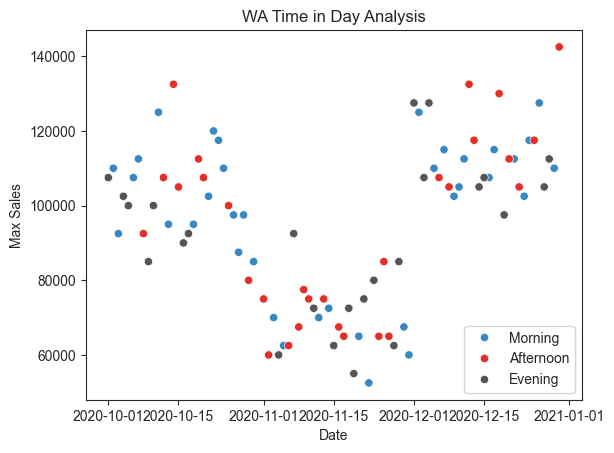

In [367]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('WA Time in Day Analysis')
sns.set_style('ticks')

<h2><b>NT Peak Time Of The Analysis Analysis</b></h2>

In [370]:
TDA=AAL

In [371]:
TDA=TDA.drop(columns = ['Group','Unit'])

In [372]:
TDA=TDA[TDA['State']==' NT']

In [374]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

In [375]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

In [376]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [377]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [378]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

In [379]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

In [380]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [381]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

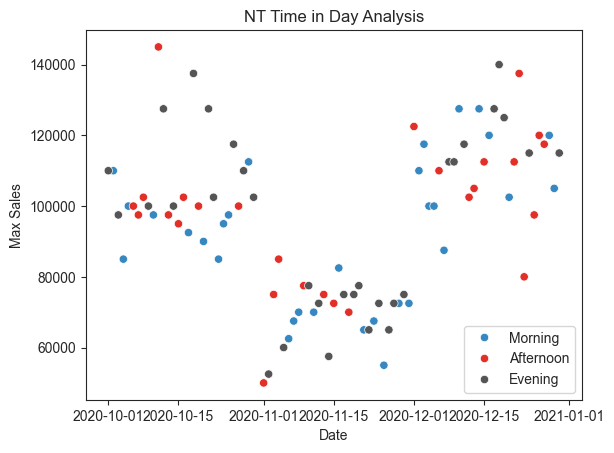

In [382]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('NT Time in Day Analysis')
sns.set_style('ticks')

<h2><b>SA Peak Time Of The Dat Analysis</h2>

In [383]:
TDA=AAL

In [384]:
TDA=TDA.drop(columns = ['Group','Unit'])

In [385]:
TDA=TDA[TDA['State']==' SA']

In [386]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

In [387]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

In [388]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [389]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [390]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

In [391]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

In [392]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [393]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

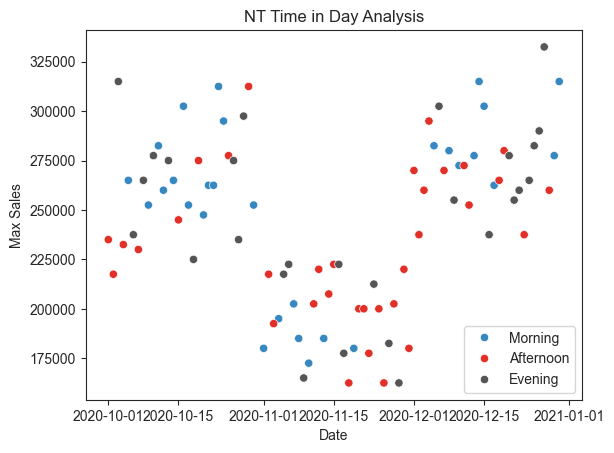

In [394]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('NT Time in Day Analysis')
sns.set_style('ticks')

<h2><b>VIC Peak Time Of The Day Analysis</b></h2>

In [396]:
TDA=AAL

In [397]:
TDA=TDA.drop(columns = ['Group','Unit'])

In [398]:
TDA=TDA[TDA['State']==' VIC']

In [399]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

In [400]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

In [401]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [402]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [403]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

In [404]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

In [405]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [406]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

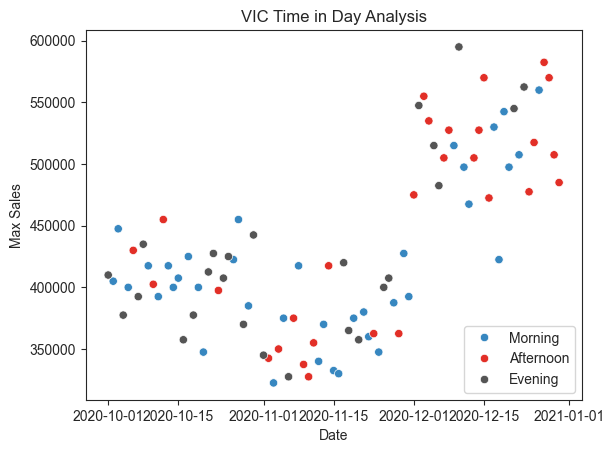

In [408]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('VIC Time in Day Analysis')
sns.set_style('ticks')

<h2><b>QLD Peak Time Of The Day</b></h2>

In [396]:
TDA=AAL

In [397]:
TDA=TDA.drop(columns = ['Group','Unit'])

In [398]:
TDA=TDA[TDA['State']==' QLD']

In [399]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

In [400]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

In [401]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [402]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [403]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

In [404]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

In [405]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [406]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

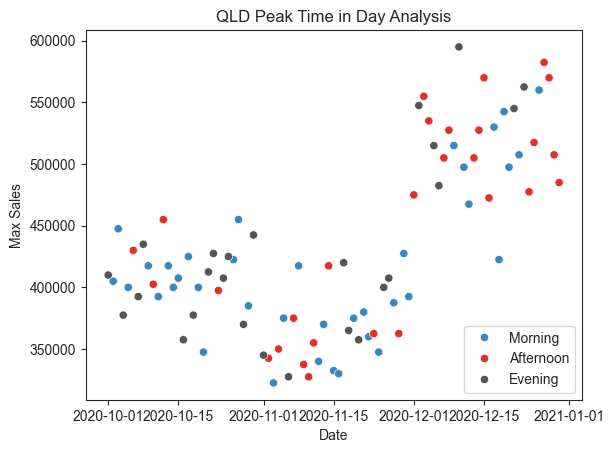

In [412]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('QLD Peak Time in Day Analysis')
sns.set_style('ticks')

<h2><b>NSW Peak Time Of The Day</h2>

In [413]:
TDA=AAL

In [414]:
TDA=TDA.drop(columns = ['Group','Unit'])

In [415]:
TDA=TDA[TDA['State']==' NSW']

In [416]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

In [417]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

In [418]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [419]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [420]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

In [421]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

In [422]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [423]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

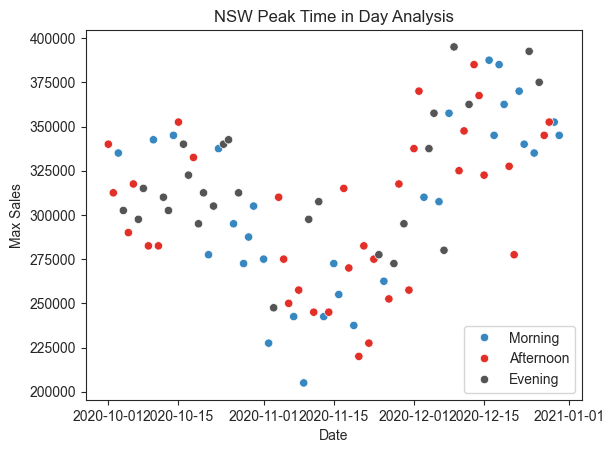

In [424]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('NSW Peak Time in Day Analysis')
sns.set_style('ticks')

<h2><b>TAS Peak Time Of The Day</h2>

In [425]:
TDA=AAL

In [426]:
TDA=TDA.drop(columns = ['Group','Unit'])

In [427]:
TDA=TDA[TDA['State']==' TAS']

In [428]:
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

In [429]:
TDWAM=pd.DataFrame(TDAM.groupby(['Date','Time'])['Sales'].sum())
TDWAA=pd.DataFrame(TDAA.groupby(['Date','Time'])['Sales'].sum())
TDWAE=pd.DataFrame(TDAE.groupby(['Date'])['Sales'].sum())

In [430]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')

In [431]:
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [432]:
TDWAMF['Max']=TDWAMF[['Morning','Afternoon','Evening']].max(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmax(axis=1)

In [433]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

In [434]:
TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [435]:
TDWAM1.rename(columns = {'Max':'Morning'}, inplace = True)
TDWAA1.rename(columns = {'Max':'Afternoon'}, inplace = True)
TDWAE1.rename(columns = {'Max':'Evening'}, inplace = True)

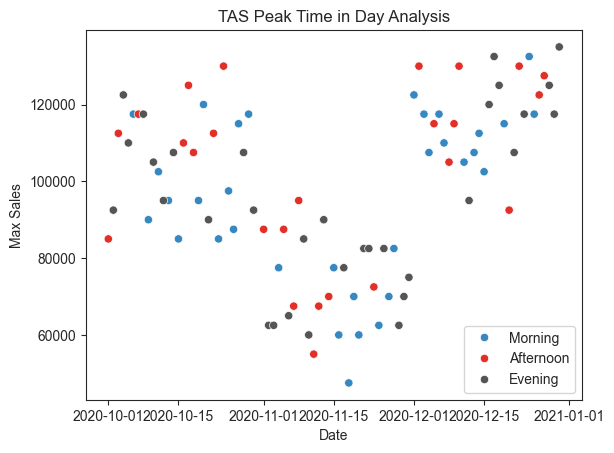

In [438]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Max Sales')
plt.title('TAS Peak Time in Day Analysis')
sns.set_style('ticks')


<h1><b>STATE Wise Peak-Off Time Of The Day</h1>

<h2><b>WA Peak-Off  Time Of The Day</h2>

In [535]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [536]:
TDA=TDA[TDA['State']==' WA']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [537]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [538]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [539]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [548]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

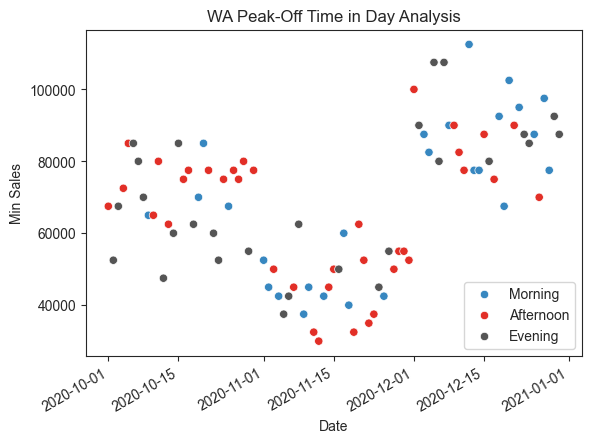

In [549]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('WA Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()

<h2><b>NT Peak-Off  Time Of The Day</h2>

In [551]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [552]:
TDA=TDA[TDA['State']==' NT']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [553]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [554]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [555]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [556]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

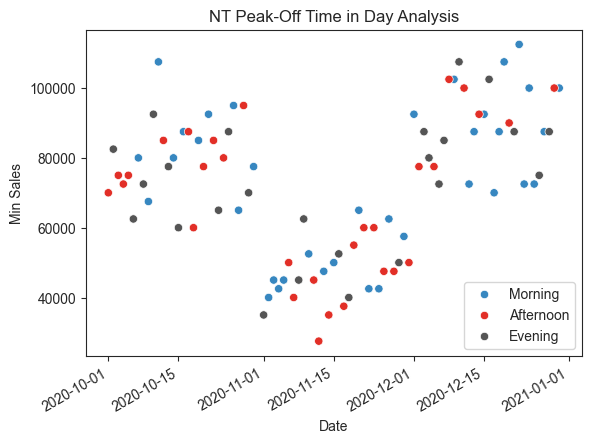

In [557]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('NT Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()

<h2><b>SA Peak-Off  Time Of The Day</b></h2>

In [558]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [559]:
TDA=TDA[TDA['State']==' SA']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [560]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [561]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [562]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [563]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

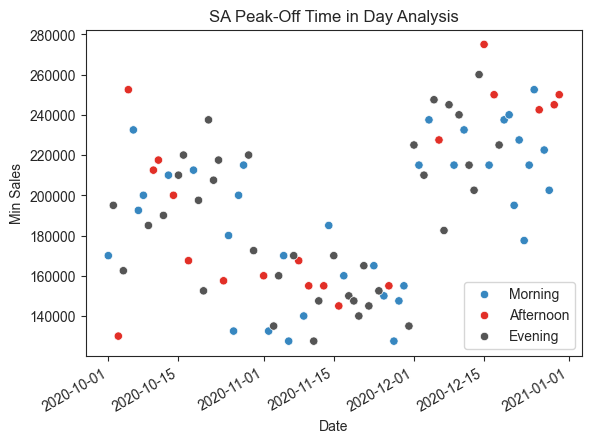

In [564]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('SA Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()

<h2><b>VIC Peak-Off  Time Of The Day</b></h2>

In [565]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [566]:
TDA=TDA[TDA['State']==' VIC']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [567]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [568]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [569]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [570]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

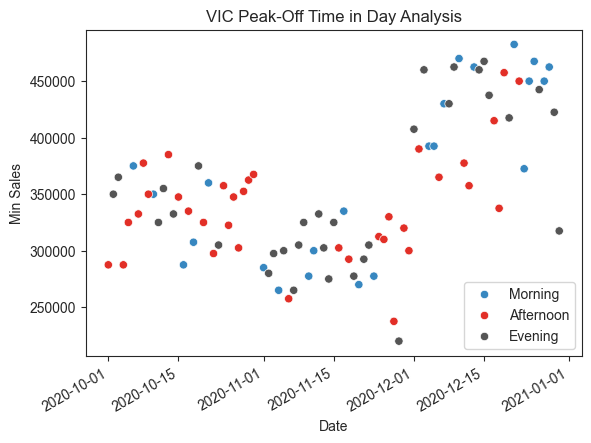

In [571]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('VIC Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()

<h2><b>QLD Peak-Off  Time Of The Day</h2>

In [572]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [573]:
TDA=TDA[TDA['State']==' QLD']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [574]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [575]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [576]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [577]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

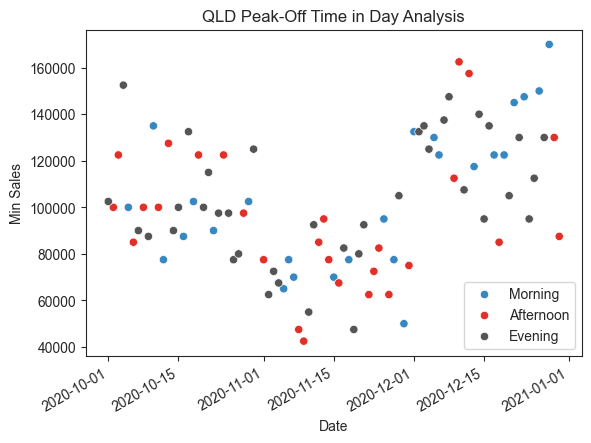

In [578]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('QLD Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()

<h2><b>NSW Peak-Off  Time Of The Day</h2>

In [579]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [580]:
TDA=TDA[TDA['State']==' NSW']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [581]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [582]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [583]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [584]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

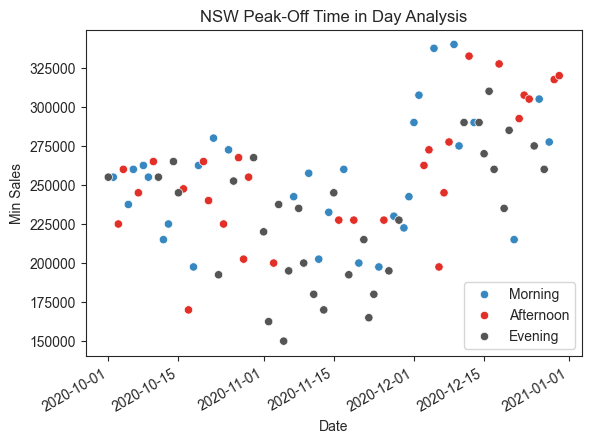

In [585]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('NSW Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()

<h2><b>TAS Peak-Off  Time Of The Day</h2>

In [586]:
TDA=AAL
TDA=TDA.drop(columns = ['Group','Unit'])

In [587]:
TDA=TDA[TDA['State']==' TAS']
TDAM=TDA[TDA['Time']==' Morning']
TDAA=TDA[TDA['Time']==' Afternoon']
TDAE=TDA[TDA['Time']==' Evening']

TDWAM=TDAM.groupby(['Date','Time'])['Sales'].sum()
TDWAA=TDAA.groupby(['Date','Time'])['Sales'].sum()
TDWAE=TDAE.groupby(['Date','Time'])['Sales'].sum()

In [588]:
TDWAMF=pd.merge(pd.merge(TDWAM,TDWAA, on = 'Date'), TDWAE, on = 'Date')
TDWAMF=TDWAMF.rename(columns = {'Sales_x':'Morning','Sales_y':'Afternoon','Sales':'Evening'})

In [589]:
TDWAMF['Min']=TDWAMF[['Morning','Afternoon','Evening']].min(axis=1)
TDWAMF['Timing']=TDWAMF[['Morning','Afternoon','Evening']].idxmin(axis=1)

In [590]:
TDWAM1=TDWAMF[TDWAMF['Timing']=='Morning']
TDWAA1=TDWAMF[TDWAMF['Timing']=='Afternoon']
TDWAE1=TDWAMF[TDWAMF['Timing']=='Evening']

TDWAM1=TDWAM1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAA1=TDWAA1.drop(columns = ['Afternoon','Evening','Timing','Morning'])
TDWAE1=TDWAE1.drop(columns = ['Afternoon','Evening','Timing','Morning'])

In [591]:
TDWAM1=TDWAM1.rename(columns = {'Min':'Morning'})
TDWAA1=TDWAA1.rename(columns = {'Min':'Afternoon'})
TDWAE1=TDWAE1.rename(columns = {'Min':'Evening'})

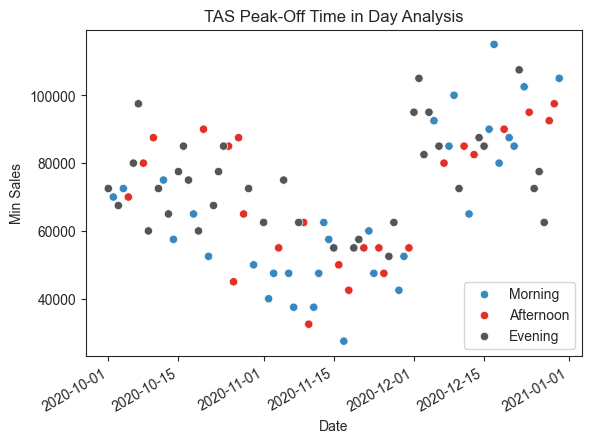

In [592]:
sns.scatterplot(TDWAM1, palette='Blues_d')
sns.scatterplot(TDWAA1, palette='Reds_d')
sns.scatterplot(TDWAE1, palette='binary_d')
plt.legend(loc = 'lower right')
plt.ylabel('Min Sales')
plt.title('TAS Peak-Off Time in Day Analysis')
sns.set_style('ticks')
plt.gcf().autofmt_xdate()